- Importing our libraries

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [202]:
superstore = pd.read_csv('SampleSuperstore.csv')
superstore.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [203]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [154]:
superstore.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Most counts
- From our data we can see clearly the items with the most counts are from the Office Supplies category, followed by Furniture and Technology categories.

In [204]:

superstore.groupby(['Category']).size()

Category
Furniture          2121
Office Supplies    6026
Technology         1847
dtype: int64

In [205]:
superstore.groupby(['Category', 'Sub-Category']).size()


Category         Sub-Category
Furniture        Bookcases        228
                 Chairs           617
                 Furnishings      957
                 Tables           319
Office Supplies  Appliances       466
                 Art              796
                 Binders         1523
                 Envelopes        254
                 Fasteners        217
                 Labels           364
                 Paper           1370
                 Storage          846
                 Supplies         190
Technology       Accessories      775
                 Copiers           68
                 Machines         115
                 Phones           889
dtype: int64

# States and Cities with lesser sales
- this can be a key area that we can look for improving our sales and Profit.

In [388]:
superstore_new = pd.DataFrame(superstore)
df_new = superstore_new[['State', 'City', 'Sales']]
df_new.groupby(['State', 'City']).sum()


Sales
State     City                
Alabama   Auburn      1766.830
          Decatur     3374.820
          Florence    1997.350
          Hoover       525.850
          Huntsville  2484.370
...                        ...
Wisconsin Superior    1299.730
          Waukesha      54.500
          Wausau       317.480
          West Allis   250.480
Wyoming   Cheyenne    1603.136

[604 rows x 1 columns]

# Catergorical plots for Category/Sub-Category/Segment against profit
- on average Furniture has returned a profit of 10%, Office Supplies Category 20% and Technology 80%
- in the sub-Categories, there are few items like Bookcases, Tables, Paper etc returning a loss (negative profit) 
- specifically Copiers shows exponential Profit peaking at 800%
- segment wise Home Office has returned profit of almost 33%, followed by Corporate sector: 30% and Consumer sector: 26%


<Figure size 432x288 with 0 Axes>

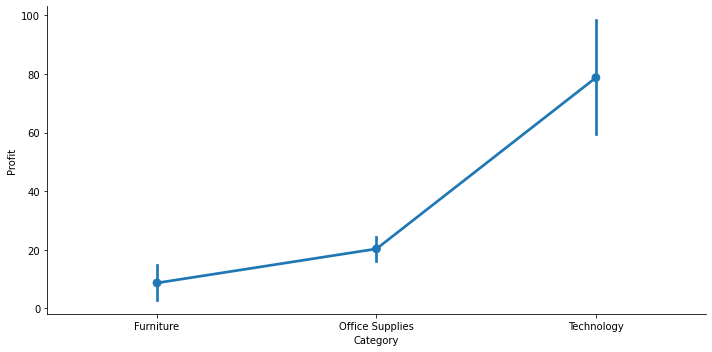

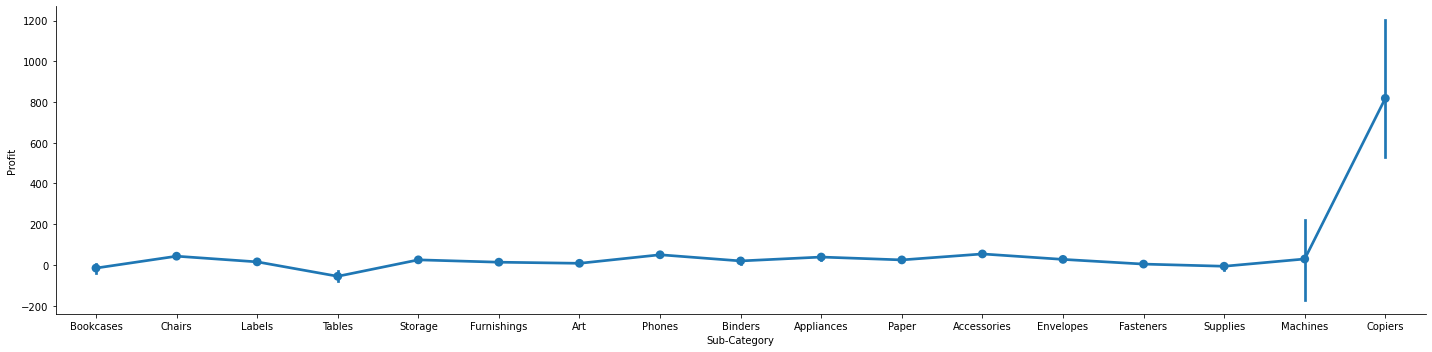

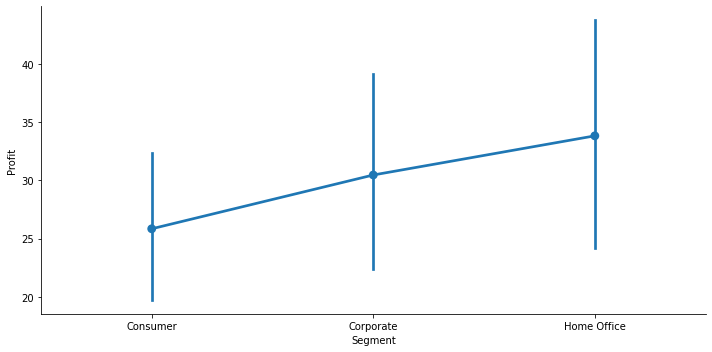

In [209]:
for i, col in enumerate(['Category', 'Sub-Category', 'Segment']):
    plt.figure(i)
    if col =='Sub-Category':
        sns.catplot(x=col, y='Profit', data=superstore, kind='point', aspect=4)
    else:
        sns.catplot(x=col, y='Profit', data=superstore, kind='point', aspect=2)

In [364]:
# fig, ax = plt.subplots(figsize=(20, 10))
# ax.scatter('Sub-Category', 'Profit', data = superstore, color= 'blue')
# plt.ylim([-1000, 1000])

# plt.show()

In [363]:
# df = pd.DataFrame(superstore)
# df1 = df[['Segment', 'Category', 'Sub-Category', 'Profit', 'Sales', 'Discount', 'Quantity', 'State', 'Region']]
# g = sns.FacetGrid(df2, 'Category', height=5, aspect=2)
# g.map(sns.barplot, 'Sub-Category', "Profit", order = ['Phones', 'Accessories', 'Machines', 'Copiers'])



# Scatter plots for Sub-Categories vs Profit
- We can Visualize the profit range from the scatter plots. In the Technology Category, profit for some Phones went up as far as 1250% approximately, but note that there are outliers which leads to overestimation. looking at the pivot table in the next cell, the average Profit for Phones is 50%. for Accessories average profit is 54%, For Machines the average Profit is 29% and for Copiers Profit is humongous 817%.
- In the Furniture Category, the average Profit for Bookcases is -15% (indicates loss), for Chairs average profit is 43%, For Tables the average Profit is -55% and for Furnishings Profit is humongous approximately 14%.
- In the Office Supplies Category, the average Profit for Labels is 15% , for Storage average profit is 25%, For Art the average Profit is 8%, for Binders Profit is approximately 20%, for Appliances profit is 39%, for Paper profit is 25%, for Envelopes profit is 27%, for Fasteners profit is 4% and for Supplies profit is -6%. 

- As a business manager, in order to increase profit, we might want to explore the option of selling more Art, Paper, Envelopes and Fasteners as their quantity is less. by selling more the profit margin can be increased. 

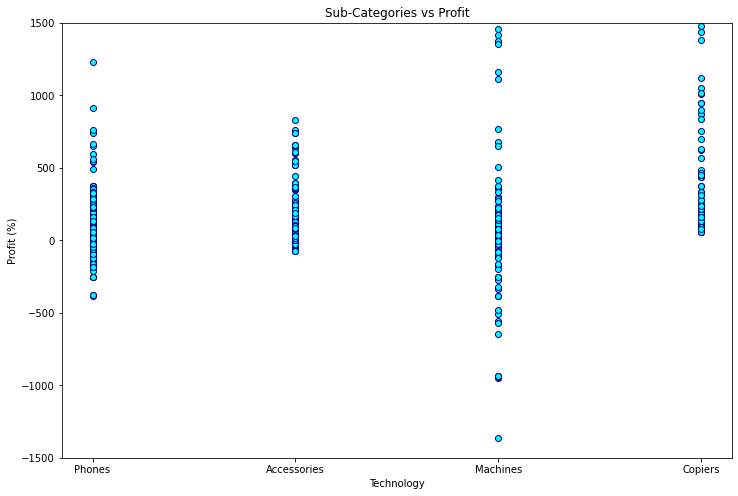

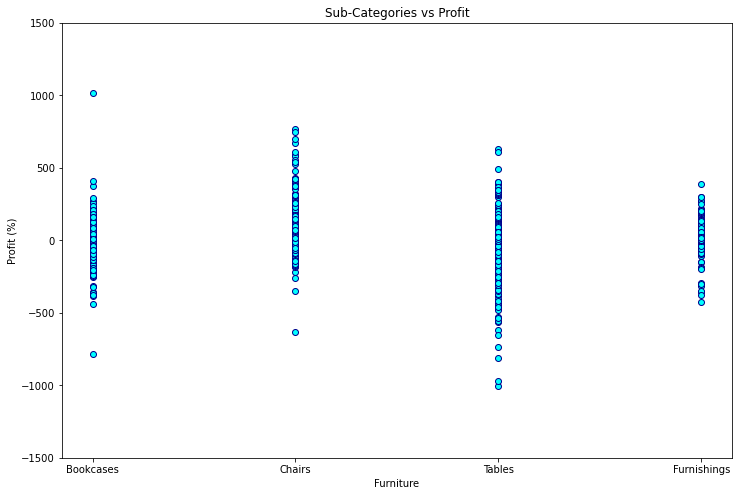

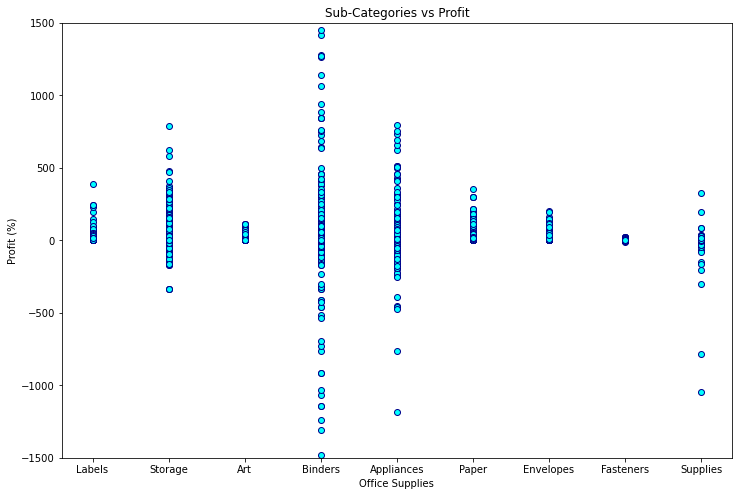

In [366]:
df = pd.DataFrame(superstore)
df1 = df[['Segment', 'Category', 'Sub-Category', 'Profit', 'Sales', 'State']]
list_name1= ['Phones', 'Accessories', 'Machines', 'Copiers']
list_name2 = ['Bookcases', 'Chairs', 'Furnishings', 'Tables']
list_name3 = ['Appliances', 'Art', 'Binders', 'Envelopes', 'Fasteners', 'Labels', 'Paper', 'Storage', 'Supplies']
ax1 = df1[df1['Sub-Category'].isin(list_name1)]
ax2 = df1[df1['Sub-Category'].isin(list_name2)]
ax3 = df1[df1['Sub-Category'].isin(list_name3)]

def graph_plot(data, x_label):
    fig, az = plt.subplots(figsize=(12, 8))
    plt.ylim([-1500, 1500])
    az.scatter('Sub-Category', 'Profit', data = data, color= 'cyan', edgecolor= 'darkblue')
    az.set(title='Sub-Categories vs Profit', xlabel= x_label, ylabel= 'Profit (%)')
plt.show()
graph_plot(ax1, 'Technology')
graph_plot(ax2, 'Furniture')
graph_plot(ax3, 'Office Supplies')


In [395]:
ax1.pivot_table('Profit', index='Category', columns='Sub-Category', aggfunc=np.mean)

Sub-Category,Accessories,Copiers,Machines,Phones
Category,,,,
Technology,54.111788,817.90919,29.432669,50.073938


In [393]:
ax2.pivot_table('Profit', index='Category', columns='Sub-Category', aggfunc=np.mean)

Sub-Category,Bookcases,Chairs,Furnishings,Tables
Category,,,,
Furniture,-15.230509,43.095894,13.645918,-55.565771


In [394]:
ax3.pivot_table('Profit', index='Category', columns='Sub-Category', aggfunc=np.mean)

Sub-Category,Appliances,Art,Binders,Envelopes,Fasteners,Labels,Paper,Storage,Supplies
Category,,,,,,,,,
Office Supplies,38.922758,8.200737,19.843574,27.418019,4.37566,15.236962,24.85662,25.152277,-6.258418


# Relational plots for better insights (Numerical Data)
- We can see that as the Discount rates are increasing as the Profit is decreasing. We might want to redirect the sales of some items that are in loss from one region to another, or we can also consider stop selling those items contributing in huge losses to halt the overall loss.
- The third relational plot shows the Profit vs Quantity plot. we can visualize a genral tren of profit increasing by increasing the quantity of items. For Furniture, we might consider decreasing the quantity to improve our profit.

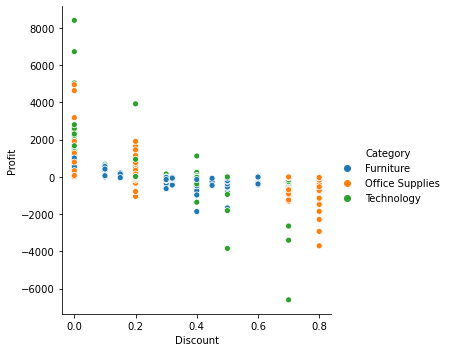

In [285]:
sns.relplot(x="Discount", y="Profit", hue = 'Category', data=df1)

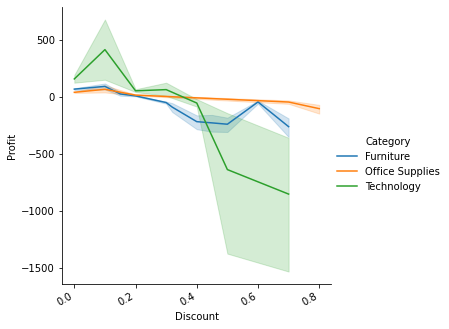

In [287]:
n = sns.relplot(x="Discount", y="Profit", hue= 'Category', kind="line", data=df1)
n.fig.autofmt_xdate()

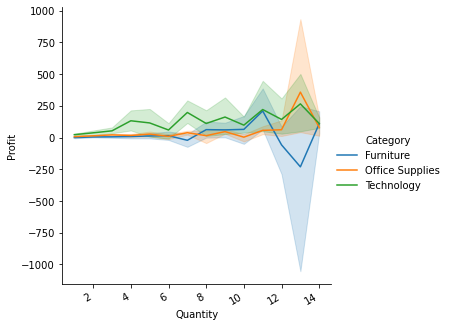

In [291]:
n = sns.relplot(x="Quantity", y="Profit", hue= 'Category', kind="line", data=df1)
n.fig.autofmt_xdate()

In [86]:
superstore.pivot_table('Profit', index='Segment', columns='Category', aggfunc=np.mean)

Category,Furniture,Office Supplies,Technology
Segment,,,
Consumer,6.281293,18.014174,74.445646
Corporate,11.741201,22.102923,79.723823
Home Office,10.705465,24.034439,89.152458


In [87]:
superstore.pivot_table('Profit', index='Segment', columns='State', aggfunc=np.mean)

State,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Segment,,,,,,,,,,,,,,,,,,,,,
Consumer,68.443756,-12.936843,85.211678,36.616450,-16.995265,35.124437,140.712257,144.470929,-0.762683,94.532064,...,8.06905,-35.908478,-39.306062,49.727697,75.02320,81.426178,72.062928,-76.953600,98.624700,NaN
Corporate,130.299450,-11.433562,50.460071,39.430168,-9.930981,54.603348,60.926064,NaN,-10.424941,94.266308,...,37.86902,-11.429254,-12.975357,25.179767,306.64546,117.878668,70.961155,NaN,72.770489,NaN
Home Office,53.418350,-27.021247,16.601556,40.714937,-144.908060,43.904217,80.830536,16.097600,-27.525773,66.327642,...,NaN,-41.141022,-7.279652,70.281770,336.63500,39.169116,42.894352,87.625067,54.632961,100.196


In [116]:
superstore.pivot_table('Sales', index='Segment', columns='State', aggfunc=np.mean)

State,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Segment,,,,,,,,,,,,,,,,,,,,,
Consumer,301.501600,149.312927,237.892162,219.118397,166.257811,137.987837,346.158429,393.334286,181.673311,287.613176,...,22.865,165.789390,183.161027,230.709806,270.476,304.988291,268.605527,673.344000,406.638857,NaN
Corporate,391.763571,170.091623,175.984286,238.146807,174.489684,211.692222,230.879333,NaN,165.276408,270.885593,...,126.983,174.031518,172.782435,163.051167,1256.448,443.572258,303.260382,NaN,263.736809,NaN
Home Office,125.465000,158.250156,45.815556,241.423358,212.257133,144.599167,197.968182,37.226667,511.864485,216.661750,...,NaN,160.635889,136.265423,211.143800,1294.750,165.591333,250.476400,178.826667,195.950714,1603.136


In [117]:
superstore.pivot_table('Discount', index='Segment', columns='State', aggfunc=np.mean)

State,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Segment,,,,,,,,,,,,,,,,,,,,,
Consumer,0.0,0.315455,0.0,0.069990,0.309474,0.006977,0.006122,0.0,0.296667,0.0,...,0.0,0.264000,0.372824,0.058065,0.0,0.0,0.064000,0.3,0.0,NaN
Corporate,0.0,0.292754,0.0,0.080421,0.301754,0.011111,0.008333,NaN,0.299632,0.0,...,0.0,0.321429,0.360577,0.083333,0.0,0.0,0.059542,NaN,0.0,NaN
Home Office,0.0,0.291111,0.0,0.067313,0.366667,0.000000,0.000000,0.0,0.305970,0.0,...,NaN,0.329630,0.381074,0.040000,0.0,0.0,0.070000,0.0,0.0,0.2


In [120]:
superstore.pivot_table('Profit', index='State', columns='Category', aggfunc=np.mean)

Category,Furniture,Office Supplies,Technology
State,,,
Alabama,111.944382,34.934283,235.557350
Arizona,-56.018833,-6.263803,2.343775
Arkansas,86.828356,54.605375,84.095893
California,20.637310,31.509503,82.089239
Colorado,-52.610475,-3.886867,-99.188129
Connecticut,94.329269,25.935822,70.993964
Delaware,48.372622,49.441669,311.952540
District of Columbia,116.694500,10.157233,648.562400
Florida,-26.529185,-7.314960,7.692823


In [278]:
superstore.pivot_table('Profit', index='State', columns='Segment', aggfunc=np.mean)

Segment,Consumer,Corporate,Home Office
State,,,
Alabama,68.443756,130.299450,53.418350
Arizona,-12.936843,-11.433562,-27.021247
Arkansas,85.211678,50.460071,16.601556
California,36.616450,39.430168,40.714937
Colorado,-16.995265,-9.930981,-144.908060
Connecticut,35.124437,54.603348,43.904217
Delaware,140.712257,60.926064,80.830536
District of Columbia,144.470929,NaN,16.097600
Florida,-0.762683,-10.424941,-27.525773


In [124]:
superstore.pivot_table('Discount', index='State', columns='Category', aggfunc=np.mean)

Category,Furniture,Office Supplies,Technology
State,,,
Alabama,0.000000,0.000000,0.000000
Arizona,0.285714,0.337795,0.231250
Arkansas,0.000000,0.000000,0.000000
California,0.108108,0.046077,0.118106
Colorado,0.311765,0.345833,0.242857
Connecticut,0.046154,0.000000,0.000000
Delaware,0.033333,0.000000,0.000000
District of Columbia,0.000000,0.000000,0.000000
Florida,0.232353,0.346288,0.226087


# Conclusion
- In the States where we are facing huge losses, we should consider deeper analysis and consider stopping the Sales in such States. In the States where the loss is marginal, we should consider increasing the Sales with nominal Discounts, we can also consider replacing those items with items which are more profitable, or we can also redirect the Sales of such items to those States where their Profit margin is greater.